In [1]:
library("stringr")
library("data.table")
library(ggplot2)
library("dplyr")
library(gridExtra)
library(reshape2)
library(stats)

Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt



In [2]:
# Defino funcion para cargar todos los data frames de entrenamiento

load_csv_data <- function(csv_file, sample_ratio = 1, drop_cols = NULL,
                          sel_cols = NULL) {
  # Esta funcion carga un unico csv con los parametros que le indique
  
  dt <- fread(csv_file, header = TRUE, sep = ",", stringsAsFactors = TRUE,
              na.strings = "", drop = drop_cols, select = sel_cols,
              showProgress = TRUE)
  return(dt)
}



load_train_data <- function(data_dir, train_file="/train_", sample_ratio=1,
                            drop_cols=NULL, sel_cols=NULL) {
  # Esta funcion se encarga de concatenar todos los dataframes juntos
  
  
  
  train_days <- seq(1, 5, by=1)
  
  dfs <- list()
  
  for (i in train_days){
  
    dfs[[i]] <- load_csv_data(csv_file = paste(data_dir,train_file,as.character(i),".csv", sep = ''), 
                              sample_ratio = sample_ratio, drop_cols = drop_cols, sel_cols = sel_cols)
  }
  
  # Uno todos los dataframes en uno solo
  
  df <- (rbindlist(dfs, fill=TRUE))
  
  # Reordeno las columnas alfabeticamente
  
  setcolorder(df, sort(colnames(df)))
  
  # Creo la columna Label con las condiciones de churn explicadas
  
  df[, Label := as.numeric(Label_max_played_dsi == 3)] 
  set.seed(123)
  if (sample_ratio < 1) {
    
    sample_size <- as.integer(sample_ratio * nrow(df))
    
    df <- df[sample(.N, sample_size)]
  }
  
  rm(dfs)
  
  
  return(df)
}


In [3]:
# Cargo dataframe de un tamaño del 10% del original

csv_dir <- "C:/Users/elosasso/OneDrive - Universidad Torcuato Di Tella/Mineria de datos/datasets"

train <- load_train_data(csv_dir, sample_ratio = 1)
train$churn <- train$Label == 1

In [4]:
head(train);dim(train)

age,BuyCard_sum_dsi0,BuyCard_sum_dsi1,BuyCard_sum_dsi2,BuyCard_sum_dsi3,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,...,WinBattle_sum_dsi0,WinBattle_sum_dsi1,WinBattle_sum_dsi2,WinBattle_sum_dsi3,WinTournamentBattle_sum_dsi0,WinTournamentBattle_sum_dsi1,WinTournamentBattle_sum_dsi2,WinTournamentBattle_sum_dsi3,Label,churn
NA,0,8,0,0,67AD0B6E,d7172d3e,aB5FcAd5,94dAb3fC,3D8Eafc7,...,4,16,0,0,0,0,0,0,0,FALSE
NA,0,0,0,0,67AD0B6E,d7172d3e,aB5FcAd5,94dAb3fC,3D8Eafc7,...,0,28,4,4,0,0,0,0,0,FALSE
NA,0,0,2,0,67AD0B6E,d7172d3e,aB5FcAd5,94dAb3fC,3D8Eafc7,...,10,12,6,0,0,0,0,0,0,FALSE
NA,0,0,12,0,c3bbD81e,A82d2dD5,B1D67C2E,4A5DdB5E,4EB489cc,...,12,34,26,8,0,0,0,0,0,FALSE
NA,0,0,16,0,67AD0B6E,d7172d3e,aB5FcAd5,94dAb3fC,3D8Eafc7,...,0,0,22,46,0,0,0,0,0,FALSE
NA,0,0,0,18,67AD0B6E,d7172d3e,aB5FcAd5,94dAb3fC,3D8Eafc7,...,2,0,0,4,0,0,0,0,0,FALSE


[1] 5547423     103

In [5]:
summary(train)

      age          BuyCard_sum_dsi0  BuyCard_sum_dsi1    BuyCard_sum_dsi2 
 Min.   :10        Min.   :  0.000   Min.   :-10000.00   Min.   :  0.000  
 1st Qu.:23        1st Qu.:  0.000   1st Qu.:     0.00   1st Qu.:  0.000  
 Median :37        Median :  0.000   Median :     0.00   Median :  0.000  
 Mean   :37        Mean   :  2.011   Mean   :   -23.32   Mean   :  1.466  
 3rd Qu.:51        3rd Qu.:  1.000   3rd Qu.:     1.00   3rd Qu.:  0.000  
 Max.   :64        Max.   :454.000   Max.   :   631.00   Max.   :496.000  
 NA's   :5381096                                                          
 BuyCard_sum_dsi3   categorical_1      categorical_2      categorical_3    
 Min.   :  0.000   67AD0B6E:4768761   d7172d3e:4768761   aB5FcAd5:4866792  
 1st Qu.:  0.000   FB2Cd102: 209499   408BCCd9: 171666   A2bEfD7e: 144385  
 Median :  0.000   273c8eEb: 148412   8CDd2dbD:  74118   504E175c:  33433  
 Mean   :  1.367   64b5BA0D:  83563   cbbffD0A:  45792   BAA58a4e:  31680  
 3rd Qu.:  0.000   7

* La columna 'age' no puede tomarse para analizar por su alto contenido de NAs, no podemos inferir estos datos de ninguna forma
* La columna 'BuyCard_sum_dsi1' tiene valores negativos, esto pareciera ser un error, y viendo el comportamiento en las demas columnas de este estilo, podria imputarse el valor 0 a estos negativos


In [6]:
# Reviso las columnas con valores nulos y sus porcentajes

columnas_nas <- list()

for (i in colnames(train)){
  nans <- nrow(filter(select(train,i), !complete.cases(select(train,i))))
  
  if (nans != 0){
    
    columnas_nas[[i]] <- (nans/nrow(train))*100
  }
  
}

as.data.frame(columnas_nas)

Note: Using an external vector in selections is ambiguous.
i Use `all_of(i)` instead of `i` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


age,categorical_7,ChangeArena_sum_dsi3,country,device_model,OpenChest_sum_dsi2,site,StartBattle_sum_dsi1
97.00172,5.701386,19.01011,2.103301,0.0002523694,13.00168,72.99049,8.898835


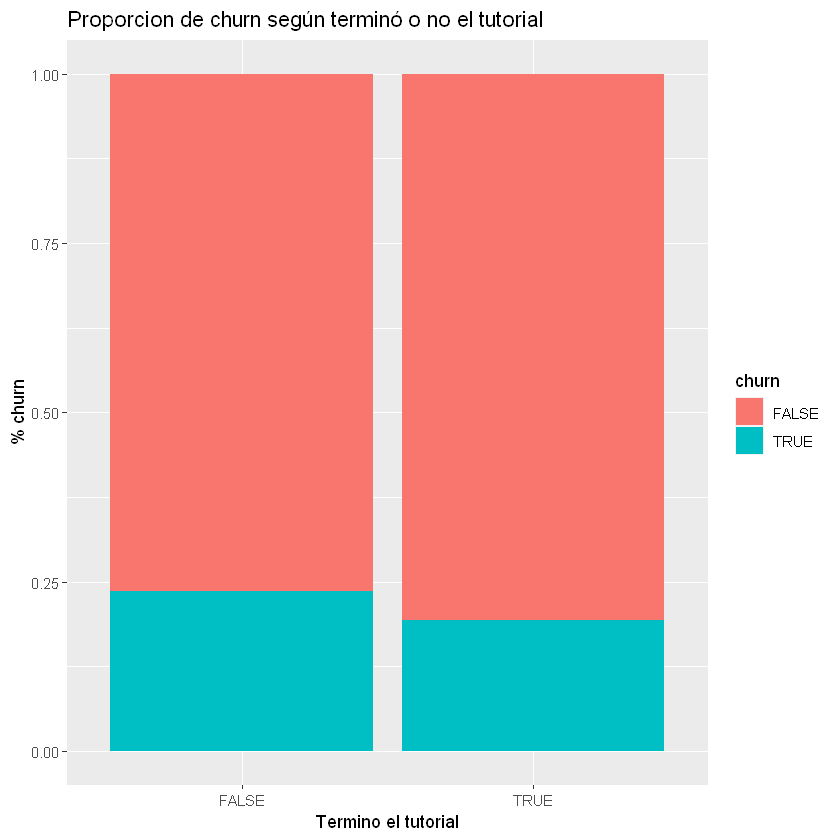

In [7]:
ggplot(train) + geom_bar(mapping = aes(x = TutorialFinish, fill = churn), position = 'fill') +
labs(x = 'Termino el tutorial', y = '% churn') +
ggtitle('Proporcion de churn según terminó o no el tutorial')

Me imagino que una persona haría Churn según haya perdido más batallas en los primeros días.
Pongo a prueba esa suposición creando la sumatoria de las variables Lose battle, Win battle y Start battle

In [8]:
train$sum_lost_battles <- train$LoseBattle_sum_dsi0 + train$LoseBattle_sum_dsi1 + train$LoseBattle_sum_dsi2 + train$LoseBattle_sum_dsi3
train$sum_win_battles <- train$WinBattle_sum_dsi0 + train$WinBattle_sum_dsi1 + train$WinBattle_sum_dsi2 + train$WinBattle_sum_dsi3
train$sum_start_battle <- train$StartBattle_sum_dsi0 + train$StartBattle_sum_dsi1 + train$StartBattle_sum_dsi2 + train$StartBattle_sum_dsi3

In [9]:
# Tomo una muestra del 10% del total para graficar los puntos porque sino es muy pesado

set.seed(123)
sample_size <- as.integer(0.1 * nrow(train))    
df <- train[sample(.N, sample_size)]

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


$title
[1] "Batallas perdidas vs Batallas iniciadas"

attr(,"class")
[1] "labels"

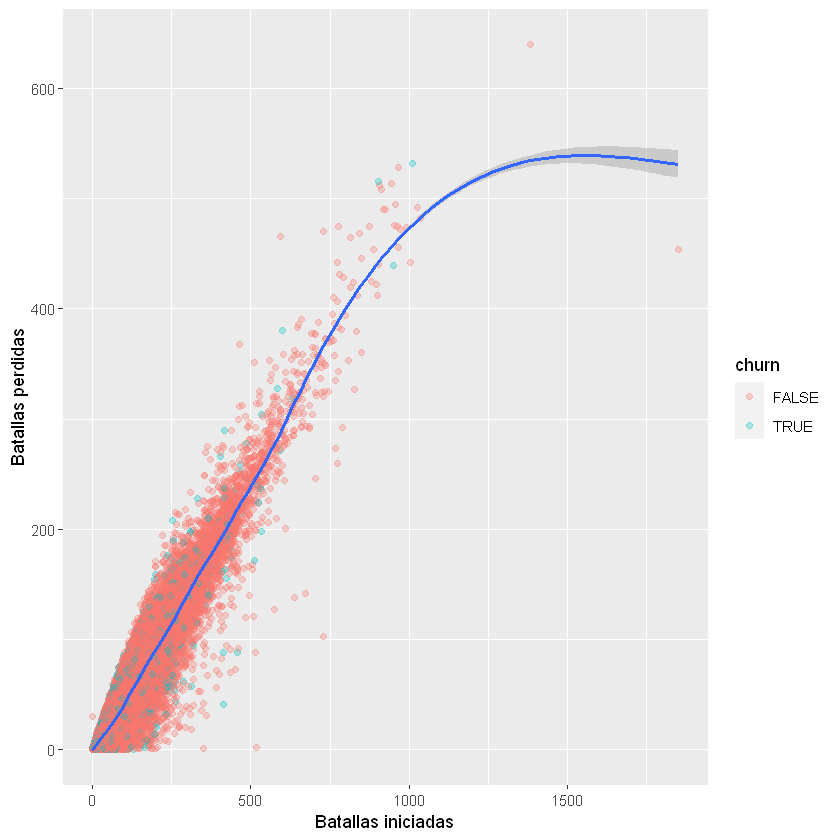

In [10]:
# Grafico

ggplot(filter(df, complete.cases(sum_start_battle))) +
geom_point(mapping = aes(x = sum_start_battle, y = sum_lost_battles, color = churn), alpha = 0.3) +
geom_smooth(mapping = aes(x = sum_start_battle, y = sum_lost_battles)) +
labs(x = 'Batallas iniciadas', y = 'Batallas perdidas')
ggtitle('Batallas perdidas vs Batallas iniciadas')

Podría ocurrir que haya alguna relación entre la cantidad de sesiones iniciadas y el hecho de hacer churn. Se busca la cantidad de sesiones iniciadas para los primeros 4 días desde la instalación hasta el día 3, para ambos grupos. 

Luego se calcula la media de sesiones iniciadas para entender si verdaderamente hay una relación

In [11]:
train_melt <- melt(select(train, user_id, StartSession_sum_dsi0,StartSession_sum_dsi1,StartSession_sum_dsi2,
                          StartSession_sum_dsi3, churn), id = c('user_id','churn'))

In [12]:
grafico <- train_melt %>% group_by(variable,churn) %>% summarize(total = sum(value)) %>% ungroup()

In [13]:
grafico

variable,churn,total
StartSession_sum_dsi0,FALSE,16475114
StartSession_sum_dsi0,TRUE,3291579
StartSession_sum_dsi1,FALSE,18871404
StartSession_sum_dsi1,TRUE,3132859
StartSession_sum_dsi2,FALSE,15846328
StartSession_sum_dsi2,TRUE,2365115
StartSession_sum_dsi3,FALSE,15973758
StartSession_sum_dsi3,TRUE,2205853


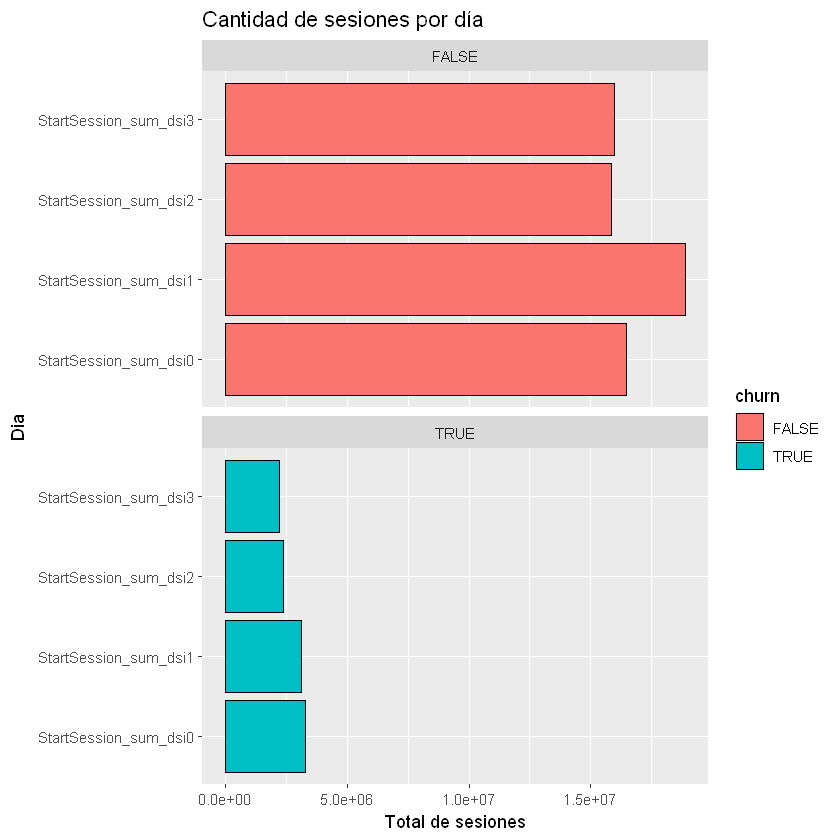

In [14]:
ggplot(grafico, mapping = aes(x = total, y = variable, fill = churn)) +
geom_bar(color = 'black',stat = 'identity', position = 'dodge') + facet_wrap(~churn, ncol = 1) +
labs(x = 'Total de sesiones', y = 'Dia') +
ggtitle('Cantidad de sesiones por día')

In [15]:
# Agrupo por dia desde la instalacion y calculo el intervalo de confianza para la media

grafico_2 <- train_melt %>% group_by(variable,churn) %>%
summarize(intervalo_inf = t.test(value, conf.level = 0.95)$conf.int[1], 
         intervalo_sup = t.test(value, conf.level = 0.95)$conf.int[2],
         mean = mean(value)) %>% ungroup()

In [16]:
grafico_2

variable,churn,intervalo_inf,intervalo_sup,mean
StartSession_sum_dsi0,FALSE,3.692099,3.698995,3.695547
StartSession_sum_dsi0,TRUE,3.016104,3.027238,3.021671
StartSession_sum_dsi1,FALSE,4.228581,4.237541,4.233061
StartSession_sum_dsi1,TRUE,2.868495,2.883438,2.875966
StartSession_sum_dsi2,FALSE,3.550424,3.558583,3.554503
StartSession_sum_dsi2,TRUE,2.163172,2.179181,2.171177
StartSession_sum_dsi3,FALSE,3.578787,3.587388,3.583087
StartSession_sum_dsi3,TRUE,2.020495,2.029453,2.024974


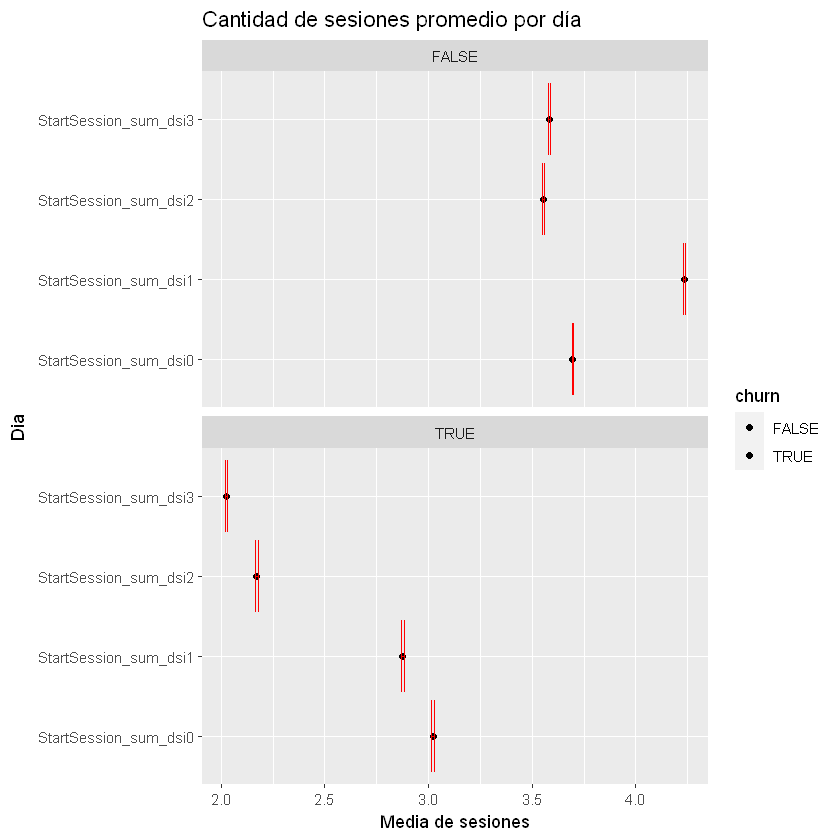

In [17]:
ggplot(grafico_2) +
geom_point(mapping = aes(x = mean, y = variable, fill = churn),color = 'black',stat = 'identity') + 
geom_errorbar(aes(xmin = intervalo_inf, xmax = intervalo_sup, y = variable), color = 'red') +
facet_wrap(~churn, ncol = 1) +
labs(x = 'Media de sesiones', y = 'Dia') + 
ggtitle('Cantidad de sesiones promedio por día')

In [18]:
grafico_3 <- train %>% group_by(install_date) %>% summarize(total_installed = n()) %>% ungroup()

In [19]:
max_installations <- c(grafico_3[order(grafico_3$total_installed, decreasing = TRUE),][c(1:5),1])

Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"Warning message:
"Ignoring unknown parameters: text"

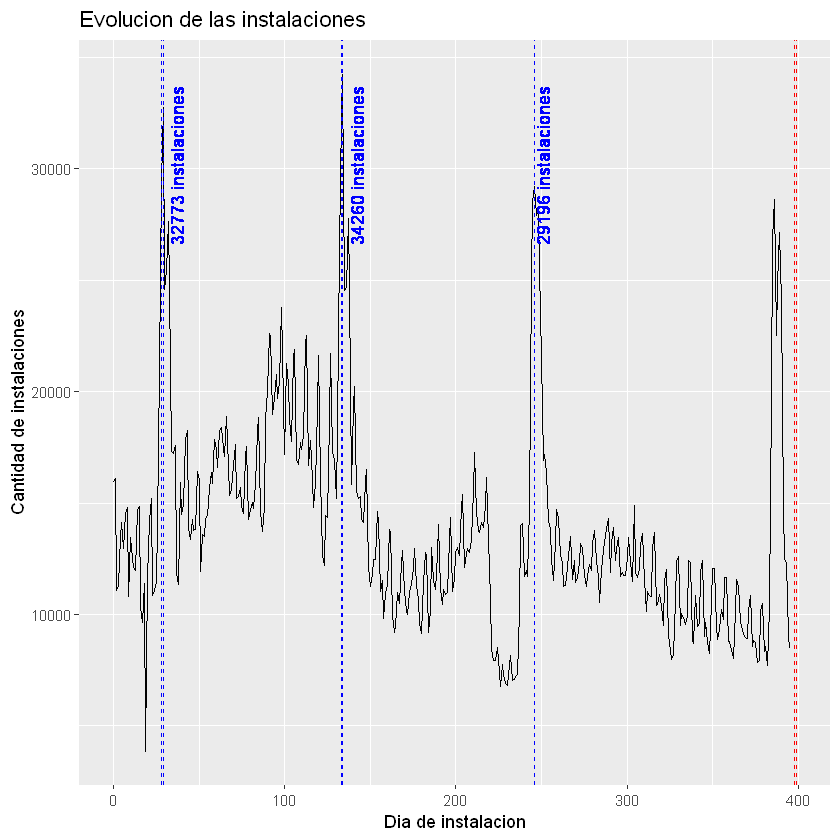

In [20]:
ggplot(grafico_3) + geom_line(mapping = aes(x = install_date, y = total_installed)) +
geom_vline(xintercept = c(398:399), color = 'red', linetype = 'dashed') +
geom_vline(xintercept = c(134,29,133,28,246), color = 'blue', linetype = 'dashed') +
geom_text(aes(x = 134, label="\n 34260 instalaciones", y = 30000), colour="blue", angle=90, text=element_text(size=5)) + 
geom_text(aes(x = 29, label="\n 32773 instalaciones", y = 30000), colour="blue", angle=90, text=element_text(size=5))+
geom_text(aes(x = 243, label="\n 29196 instalaciones", y = 30000), colour="blue", angle=90, text=element_text(size=5)) +
labs(x = 'Dia de instalacion', y = 'Cantidad de instalaciones') + 
ggtitle('Evolucion de las instalaciones')

Busco si existe una relación entre la cantidad de batallas ganadas/ batallas perdidas

In [39]:
train$rt_lose_win_0 <- train$WinBattle_sum_dsi0 - train$LoseBattle_sum_dsi0
train$rt_lose_win_1 <- train$WinBattle_sum_dsi1 - train$LoseBattle_sum_dsi1
train$rt_lose_win_2 <- train$WinBattle_sum_dsi2 - train$LoseBattle_sum_dsi2
train$rt_lose_win_3 <- train$WinBattle_sum_dsi3 - train$LoseBattle_sum_dsi3

In [40]:
train_melt <- melt(select(train, user_id, rt_lose_win_0,rt_lose_win_1,rt_lose_win_2,
                          rt_lose_win_3, churn), id = c('user_id','churn'))

In [42]:
grafico_4 <- train_melt %>% group_by(variable,churn) %>%
summarize(intervalo_inf = t.test(value, conf.level = 0.95)$conf.int[1], 
         intervalo_sup = t.test(value, conf.level = 0.95)$conf.int[2],
         mean = mean(value)) %>% ungroup()

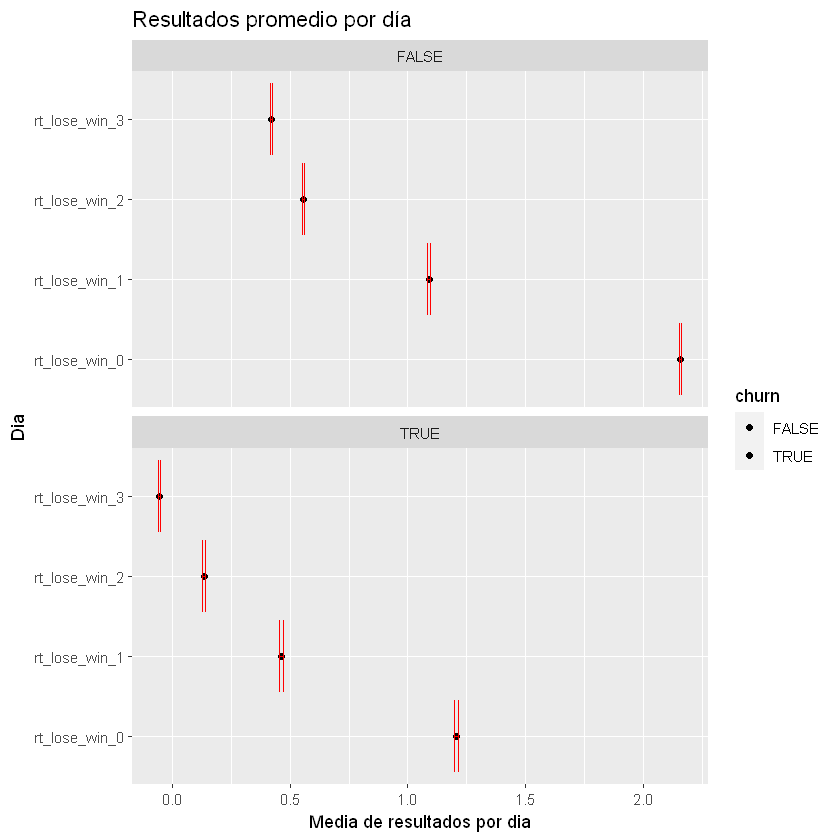

In [44]:
ggplot(grafico_4) +
geom_point(mapping = aes(x = mean, y = variable, fill = churn),color = 'black',stat = 'identity') + 
geom_errorbar(aes(xmin = intervalo_inf, xmax = intervalo_sup, y = variable), color = 'red') +
facet_wrap(~churn, ncol = 1) +
labs(x = 'Media de resultados por dia', y = 'Dia') + 
ggtitle('Resultados promedio por día')

Promedio de batallas perdidas por día

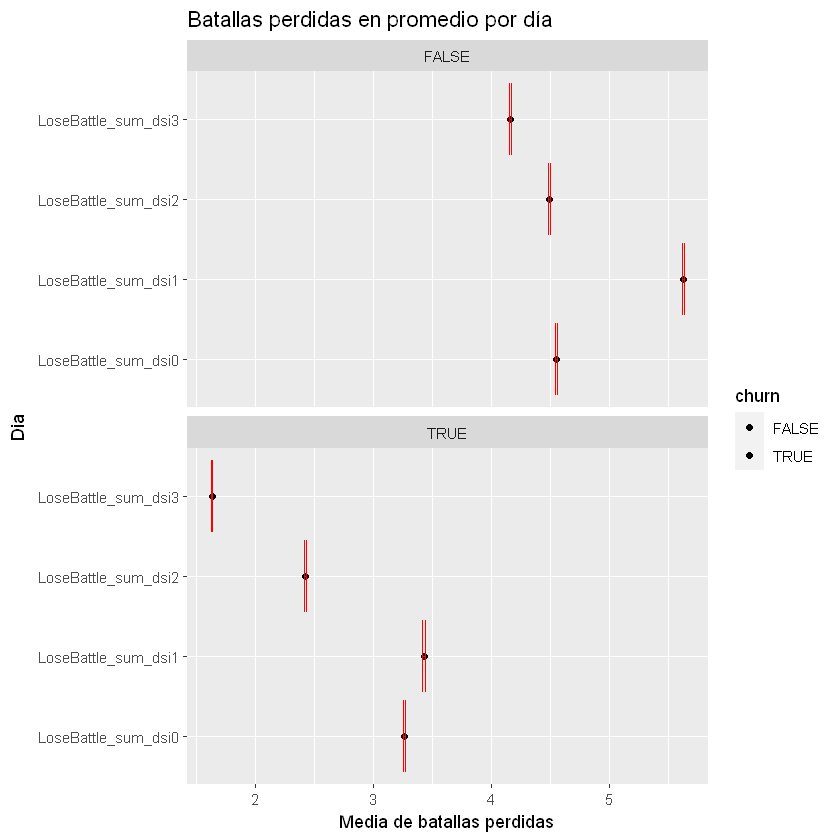

In [47]:
train_melt <- melt(select(train, user_id, LoseBattle_sum_dsi0,LoseBattle_sum_dsi1,LoseBattle_sum_dsi2,
                          LoseBattle_sum_dsi3, churn), id = c('user_id','churn'))

grafico_5 <- train_melt %>% group_by(variable,churn) %>%
summarize(intervalo_inf = t.test(value, conf.level = 0.95)$conf.int[1], 
         intervalo_sup = t.test(value, conf.level = 0.95)$conf.int[2],
         mean = mean(value)) %>% ungroup()

ggplot(grafico_5) +
geom_point(mapping = aes(x = mean, y = variable, fill = churn),color = 'black',stat = 'identity') + 
geom_errorbar(aes(xmin = intervalo_inf, xmax = intervalo_sup, y = variable), color = 'red') +
facet_wrap(~churn, ncol = 1) +
labs(x = 'Media de batallas perdidas', y = 'Dia') + 
ggtitle('Batallas perdidas en promedio por día')

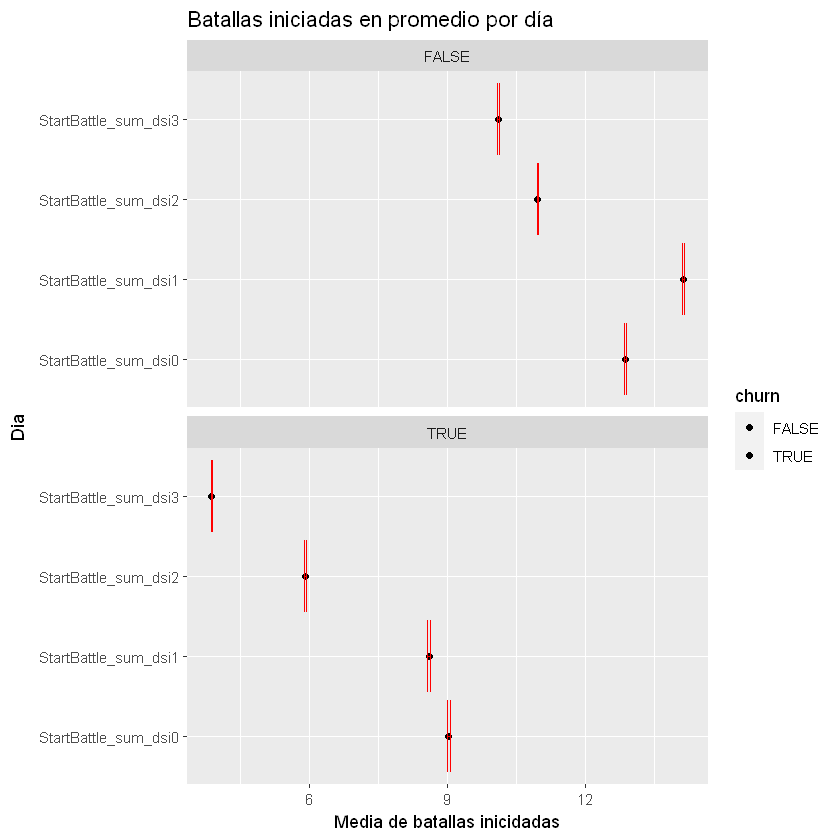

In [48]:
train_melt <- melt(select(filter(train,complete.cases(StartBattle_sum_dsi1)), user_id,
                          StartBattle_sum_dsi0,StartBattle_sum_dsi1,StartBattle_sum_dsi2,
                          StartBattle_sum_dsi3, churn), id = c('user_id','churn'))

grafico_6 <- train_melt %>% group_by(variable,churn) %>%
summarize(intervalo_inf = t.test(value, conf.level = 0.95)$conf.int[1], 
         intervalo_sup = t.test(value, conf.level = 0.95)$conf.int[2],
         mean = mean(value)) %>% ungroup()

ggplot(grafico_6) +
geom_point(mapping = aes(x = mean, y = variable, fill = churn),color = 'black',stat = 'identity') + 
geom_errorbar(aes(xmin = intervalo_inf, xmax = intervalo_sup, y = variable), color = 'red') +
facet_wrap(~churn, ncol = 1) +
labs(x = 'Media de batallas inicidadas', y = 'Dia') + 
ggtitle('Batallas iniciadas en promedio por día')